<a href="https://colab.research.google.com/github/Amos0707/ML/blob/main/3_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#load Datasets
Dp = pd.read_csv('laptop_prices.csv')

In [ ]:
Dp.head()

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($)
0,Apple,AMD Ryzen 3,64,512GB SSD,Nvidia GTX 1650,17.3,2560x1440,8.9,1.42,FreeDOS,3997.07
1,Razer,AMD Ryzen 7,4,1TB SSD,Nvidia RTX 3080,14.0,1366x768,9.4,2.57,Linux,1355.78
2,Asus,Intel i5,32,2TB SSD,Nvidia RTX 3060,13.3,3840x2160,8.5,1.74,FreeDOS,2673.07
3,Lenovo,Intel i5,4,256GB SSD,Nvidia RTX 3080,13.3,1366x768,10.5,3.10,Windows,751.17
4,Razer,Intel i3,4,256GB SSD,AMD Radeon RX 6600,16.0,3840x2160,5.7,3.38,Linux,2059.83


In [ ]:
Dp.tail()

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($)
11763,Acer,Intel i3,4,2TB SSD,Nvidia RTX 2060,17.3,1366x768,11.5,1.58,macOS,704.82
11764,Asus,Intel i3,4,2TB SSD,AMD Radeon RX 6800,16.0,1366x768,9.5,2.14,Linux,775.59
11765,Razer,AMD Ryzen 9,4,2TB SSD,AMD Radeon RX 6600,15.6,2560x1440,8.2,2.05,Linux,2789.46
11766,Samsung,AMD Ryzen 7,16,512GB SSD,Integrated,13.3,1920x1080,7.5,1.48,macOS,1067.13
11767,Samsung,Intel i7,8,256GB SSD,Nvidia RTX 3080,17.3,2560x1440,6.4,2.45,FreeDOS,1579.55


In [ ]:
Dp.shape

(11768, 11)

In [ ]:
Dp.columns

Index(['Brand', 'Processor', 'RAM (GB)', 'Storage', 'GPU',
       'Screen Size (inch)', 'Resolution', 'Battery Life (hours)',
       'Weight (kg)', 'Operating System', 'Price ($)'],
      dtype='object')

In [ ]:
Dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11768 entries, 0 to 11767
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 11768 non-null  object 
 1   Processor             11768 non-null  object 
 2   RAM (GB)              11768 non-null  int64  
 3   Storage               11768 non-null  object 
 4   GPU                   11768 non-null  object 
 5   Screen Size (inch)    11768 non-null  float64
 6   Resolution            11768 non-null  object 
 7   Battery Life (hours)  11768 non-null  float64
 8   Weight (kg)           11768 non-null  float64
 9   Operating System      11768 non-null  object 
 10  Price ($)             11768 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 1011.4+ KB


In [ ]:
Dp.describe()

,RAM (GB),Screen Size (inch),Battery Life (hours),Weight (kg),Price ($)
count,11768.000000,11768.000000,11768.000000,11768.000000,11768.000000
mean,24.852821,15.212305,8.027855,2.341117,2183.571608
std,21.762567,1.436997,2.305400,0.667921,1316.886132
min,4.000000,13.300000,4.000000,1.200000,279.570000
25%,8.000000,14.000000,6.000000,1.760000,1272.045000
50%,16.000000,15.600000,8.000000,2.340000,1840.865000
75%,32.000000,16.000000,10.000000,2.910000,2698.370000
max,64.000000,17.300000,12.000000,3.500000,10807.880000


<Axes: >

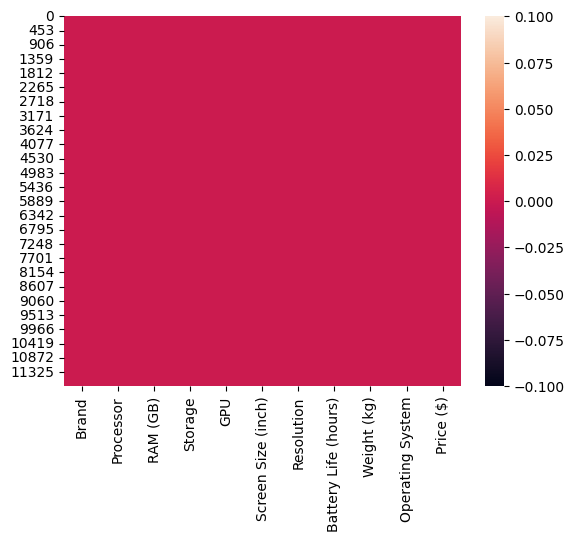

In [ ]:
#visualization
sns.heatmap(Dp.isnull())

In [ ]:
Dp.isnull().sum()

,0
Brand,0
Processor,0
RAM (GB),0
Storage,0
GPU,0
Screen Size (inch),0
Resolution,0
Battery Life (hours),0
Weight (kg),0
Operating System,0


In [ ]:
#Data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report



In [ ]:
#labelEncoding

le = LabelEncoder()
Dp['Brand'] = le.fit_transform(Dp['Brand'])
Dp['Operating System '] = le.fit_transform(Dp['Operating System'])
Dp['Processor'] = le.fit_transform(Dp['Processor'])
Dp['GPU'] = le.fit_transform(Dp['GPU'])
Dp['Storage'] = le.fit_transform(Dp['Storage'])
Dp['Resolution'] = le.fit_transform(Dp['Resolution'])


In [ ]:
Dp.shape

(11768, 12)

In [ ]:
Dp.describe()

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Price ($),Operating System
count,11768.000000,11768.000000,11768.000000,11768.000000,11768.000000,11768.000000,11768.000000,11768.000000,11768.000000,11768.000000,11768.000000
mean,4.460486,3.511982,24.852821,2.028722,3.002209,-0.005778,1.505693,-0.002804,-0.003739,0.141061,1.495751
std,2.869467,2.289424,21.762567,1.416384,1.992122,0.634388,1.119966,0.652307,0.651976,0.712515,1.116857
min,0.000000,0.000000,4.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2.000000,2.000000,8.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,16.000000,2.000000,3.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
75%,7.000000,6.000000,32.000000,3.000000,5.000000,0.000000,3.000000,0.000000,0.000000,0.000000,2.000000
max,9.000000,7.000000,64.000000,4.000000,6.000000,1.000000,3.000000,1.000000,1.000000,6.000000,3.000000


In [ ]:
Dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11768 entries, 0 to 11767
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Brand                 11768 non-null  int64 
 1   Processor             11768 non-null  int64 
 2   RAM (GB)              11768 non-null  int64 
 3   Storage               11768 non-null  int64 
 4   GPU                   11768 non-null  int64 
 5   Screen Size (inch)    11768 non-null  int64 
 6   Resolution            11768 non-null  int64 
 7   Battery Life (hours)  11768 non-null  int64 
 8   Weight (kg)           11768 non-null  int64 
 9   Operating System      11768 non-null  object
 10  Price ($)             11768 non-null  int64 
 11  Operating System      11768 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 1.1+ MB


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score


In [ ]:
for col in Dp.select_dtypes(include='object').columns:
    Dp[col] = le.fit_transform(Dp[col])


In [ ]:
Dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11768 entries, 0 to 11767
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Brand                 11768 non-null  int64
 1   Processor             11768 non-null  int64
 2   RAM (GB)              11768 non-null  int64
 3   Storage               11768 non-null  int64
 4   GPU                   11768 non-null  int64
 5   Screen Size (inch)    11768 non-null  int64
 6   Resolution            11768 non-null  int64
 7   Battery Life (hours)  11768 non-null  int64
 8   Weight (kg)           11768 non-null  int64
 9   Operating System      11768 non-null  int64
 10  Price ($)             11768 non-null  int64
 11  Operating System      11768 non-null  int64
dtypes: int64(12)
memory usage: 1.1 MB


In [ ]:
# Prepare the features (X) and target (y)
x = Dp.drop('Price ($)',axis=1)
y = Dp['Price ($)']

In [ ]:
#Spliting data into traning and testing data
x_trains,x_tests,y_trains,y_tests = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
#model Building
model = DecisionTreeRegressor()
model.fit(x_trains,y_trains)

DecisionTreeRegressor()

In [ ]:
y_pred = model.predict(x_tests)

In [ ]:
# Evaluate The model
mse = mean_squared_error(y_tests,y_pred)
r2 = r2_score(y_tests,y_pred)

In [ ]:
print('Mean Squared Error:',mse)
print('R2 Score:',r2)

Mean Squared Error: 0.22727272727272727
R2 Score: 0.5658103816754942


In [ ]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder


In [ ]:
x = Dp.drop('Price ($)',axis=1)
y = Dp['Price ($)']

In [ ]:
model = DecisionTreeClassifier()
model.fit(x_trains,y_trains)

DecisionTreeClassifier()

In [ ]:
y_pred = model.predict(x_tests)

In [ ]:
print(accuracy_score(y_tests,y_pred))
print(confusion_matrix(y_tests,y_pred))
print(classification_report(y_tests,y_pred))

0.836873406966865
[[ 109   70    0    0    0    0    0    0]
 [  72 1698   69   11    1    0    0    0]
 [   0   58  102   34    3    0    0    0]
 [   0    7   24   40    5    3    1    0]
 [   0    0    2   10   17    0    2    4]
 [   0    0    1    1    2    3    0    0]
 [   0    0    0    0    2    0    0    0]
 [   0    0    0    0    1    0    1    1]]
              precision    recall  f1-score   support

          -1       0.60      0.61      0.61       179
           0       0.93      0.92      0.92      1851
           1       0.52      0.52      0.52       197
           2       0.42      0.50      0.45        80
           3       0.55      0.49      0.52        35
           4       0.50      0.43      0.46         7
           5       0.00      0.00      0.00         2
           6       0.20      0.33      0.25         3

    accuracy                           0.84      2354
   macro avg       0.46      0.47      0.47      2354
weighted avg       0.84      0.84      0.

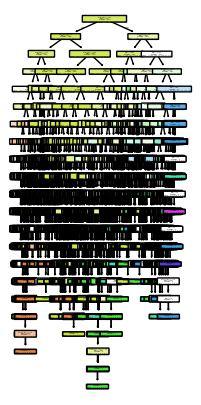

In [ ]:


from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming 'model' is your trained DecisionTreeClassifier
plt.figure(figsize=(2,5))
plot_tree(model, filled=True, feature_names=x.columns, rounded=True)
plt.show()
